## Playing around with VIDE

In [7]:
import os, sys, shutil, pdb
import vide
import numpy as np
import healpy as hp

Temporarily adding local check-out to path.

In [21]:
repodir = '/global/homes/c/chanun/cosmic_voids/py'
sys.path.append(repodir)
#sys.path

In [12]:
from cosmic_voids import plotting

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
def vide_prepare_example_sim(outdir, continueRun=False, startCatalogStage=1,
                             endCatalogStage=3, regenerateFlag=False,
                             mergingThreshold=1e-9):
    """
    continueRun - set to True to enable restarting aborted jobs  

    """
    from vide.backend.classes import Sample
    
    dataSampleList = []

    setName = "sim_ss1.0"

    workDir = "/global/u2/c/chanun/examples/example_simulation//sim_ss1.0/"
    inputDataDir = "/global/u2/c/chanun/examples/"
    figDir = "/global/u2/c/chanun/figs/example_simulation//sim_ss1.0/"
    logDir = "/global/u2/c/chanun/logs/example_simulation//sim_ss1.0/"

    numZobovDivisions = 2
    numZobovThreads = 2

    newSample = Sample(dataFile = "example_simulation_z0.0.dat",
                       dataFormat = "multidark",
                       dataUnit = 1,
                       fullName = "sim_ss1.0_z0.00_d00",
                       nickName = " SS 1.0, z = 0.00",
                       dataType = "simulation",
                       zBoundary = (0.00, 0.36),
                       zRange    = (0.00, 0.36),
                       zBoundaryMpc = (0.00, 999.98),
                       shiftSimZ = False,
                       omegaM    = 0.2847979853038958,
                       minVoidRadius = 1,
                       profileBinSize = "auto",
                       includeInHubble = True,
                       partOfCombo = False,
                       boxLen = 999.983,
                       usePecVel = False,
                       numSubvolumes = 1,
                       mySubvolume = "00",
                       useLightCone = False,
                       subsample = "1.0")
    dataSampleList.append(newSample)

In [42]:
import void_pipeline
void_pipeline.__file__

'/usr/local/lib/python3.8/dist-packages/vide-2.0-py3.8-linux-x86_64.egg/void_pipeline/__init__.py'

In [43]:
#from vide.backend.classes import Sample
from vide.backend import generateCatalog


Help on class Sample in module vide.backend.classes:

class Sample(builtins.object)
 |  Sample(dataFile='', fullName='', dataUnit=1, nickName='', maskFile='', selFunFile='', zBoundary=(), zRange=(), zBoundaryMpc=(), shiftSimZ=False, minVoidRadius=-1, fakeDensity=0.01, volumeLimited=True, numAPSlices=1, includeInHubble=True, partOfCombo=False, isCombo=False, comboList=(), profileBinSize=2.0, boxLen=1024, usePecVel=False, omegaM=0.27, numSubvolumes=1, mySubvolume=1, dataFormat='sdss', useComoving=True, dataType='observation', subsample=1.0, useLightCone=False, autoNumInStack=-1, autoPartInStack=-1)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, dataFile='', fullName='', dataUnit=1, nickName='', maskFile='', selFunFile='', zBoundary=(), zRange=(), zBoundaryMpc=(), shiftSimZ=False, minVoidRadius=-1, fakeDensity=0.01, volumeLimited=True, numAPSlices=1, includeInHubble=True, partOfCombo=False, isCombo=False, comboList=(), profileBinSize=2.0, boxLen=1024, usePecVel=False, omegaM=0.27,

### Test Example Simulation

1. mkdir vide_test
2. cp vide_public/python_tools/void_pipeline/datasets/example_simulation.py vide_test/ 
3. mkdir vide_test/examples
4. cp vide_public/examples/example_simulation_z0.0.dat vide_test/examples
5. cd $HOME/vide_test 
6. vide_prepare_simulation --all --parm example_simulation.py 
7. python3 -m void_pipeline example_simulation/sim_ss1.0.py 

In [29]:
simdir = os.path.join(os.environ.get('SCRATCH'), 'vide-example-sim')
if not os.path.isdir(simdir):# or True:
    os.makedirs(simdir, exist_ok=True)
    shutil.copy(os.path.join(repodir, 'cosmic_voids', 'example_simulation.py'), simdir+'/')
simdir

'/global/cscratch1/sd/chanun/vide-example-sim'

In [36]:
!vide_prepare_simulation --help

usage: vide_prepare_simulation [-h] [--scripts] [--subsamples] [--halos]
                               [--hod] [--all] [--parm PARM]

options

optional arguments:
  -h, --help    show this help message and exit
  --scripts     write scripts
  --subsamples  write subsamples
  --halos       write halos
  --hod         write hod
  --all         write everything
  --parm PARM   path to parameter file


In [33]:
#print(os.path.join(simdir, 'example_simulation.py'))
!vide_prepare_simulation --all --parm /global/cscratch1/sd/chanun/vide-example-sim/example_simulation.py

 Loading parameters from /global/cscratch1/sd/chanun/vide-example-sim/example_simulation.py
 Doing subsample 1.0 scripts
 Done!


/global/u2/c/chanun


## SDSS ##

In [49]:
from vide import loadVoidCatalog
help(loadVoidCatalog)

Help on function loadVoidCatalog in module vide.voidUtil.catalogUtil:

loadVoidCatalog(sampleDir, dataPortion='central', loadParticles=True, untrimmed=False)
    # -----------------------------------------------------------------------------



In [44]:
tpath = '/global/cscratch1/sd/chanun/void_catalog_2015.03.31/mock1024/mt_halos_minnone/sample_mt_halos_minnone_z0.00_d00'
testcenuntrim = vide.loadVoidCatalog(tpath, dataPortion="central", loadParticles=True,untrimmed=True)

ModuleNotFoundError: No module named 'void_python_tools'

In [50]:
import pickle
with open(tpath+"/sample_info.dat", 'rb') as input:
    sample = pickle.load(input)


ModuleNotFoundError: No module named 'void_python_tools'

## MISC ##

In [12]:
path2 = '/global/cscratch1/sd/chanun/void_catalog_2015.03.31/figures'
datafile = os.path.join(path2, "fig5_all.dat")
test = np.loadtxt(datafile)

In [28]:
test[1][0]

9.814815

In [29]:
radius = []

for i in range(len(test)): radius.append(test[i][0])

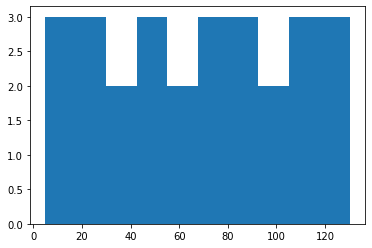

In [32]:
plt.hist(radius);

In [39]:
%cd ..
%cd ..

/global/u2
/global


In [40]:
!pwd

/global


In [43]:
tpath = 'cscratch1/sd/chanun/void_catalog_2015.03.31/lanl/lanl_halos_minnone_pv/sample_lanl_halos_minnone_pv_z0.53_d00'

In [ ]:
#'/global/cscratch1/sd/chanun/void_catalog_2015.03.31/lanl/lanl_halos_minnone_pv/lanl_halos_minnone_pv_z0.53_d00'

In [48]:
testcenuntrim = vide.loadVoidCatalog(tpath, dataPortion="central", loadParticles=True,untrimmed=True)

ModuleNotFoundError: No module named 'void_python_tools'

In [33]:
radius

[5.0,
 9.814815,
 14.62963,
 19.444444,
 24.259259,
 29.074074,
 33.888889,
 38.703704,
 43.518519,
 48.333333,
 53.148148,
 57.962963,
 62.777778,
 67.592593,
 72.407407,
 77.222222,
 82.037037,
 86.851852,
 91.666667,
 96.481481,
 101.296296,
 106.111111,
 110.925926,
 115.740741,
 120.555556,
 125.37037,
 130.185185]

In [2]:
#the path where the simulation data is located; VIDE outputs
path = '/global/homes/c/chanun/sandbox2021/vide_public/vide_test/examples/example_simulation/sim_ss1.0/sample_sim_ss1.0_z0.00_d00'
#path for figures
figpath = '/global/homes/c/chanun/sandbox2021/vide_public/vide_test/figs'

In [3]:
#We can get these catalogs by using the following function. 
#given: directory, central or all, load particle info, untrimmed/trimmed
cen_trim = vide.loadVoidCatalog(path, dataPortion="central", loadParticles=True,untrimmed=False)
#all_trim = vide.loadVoidCatalog(path, dataPortion="all", loadParticles=True,untrimmed=False)

Loading info...
Loading voids...
Read 2202 voids
Loading macrocenters...
Loading derived void information...
Loading all particles...
    Loading particle data...
Loading volumes...
Loading zone-void membership info...
Loading particle-zone membership info...


In [5]:
#number of voids, 0 for all_trim ??
len(cen_trim.voids)

2202

In [4]:
#if untrimmed is True then catalog contains all voids 
cen_untrim = vide.loadVoidCatalog(path, dataPortion="central", loadParticles=True,untrimmed=True)
#all_untrim =vide.loadVoidCatalog(path, dataPortion="all", loadParticles=True,untrimmed=True)

Loading info...
Loading voids...
Read 3061 voids
Loading macrocenters...
Loading derived void information...
Loading all particles...
    Loading particle data...
Loading volumes...
Loading zone-void membership info...
Loading particle-zone membership info...


In [7]:
#3061 for both
len(cen_untrim.voids)

3061

In [11]:
vlist = [cen_trim,cen_untrim]

Plotting ellipticity distributions


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


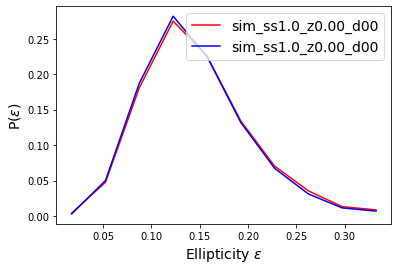

In [65]:
#plots ellipticity distributions

vide.plotEllipDist(vlist,figDir=figpath,plotName='ellipdist')

Plotting ellipticity distributions


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


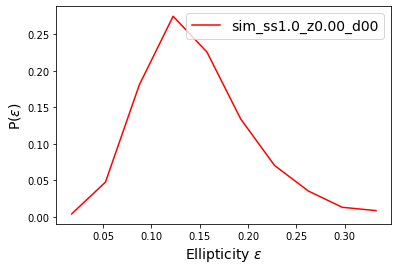

In [67]:
#plots ellipticity distributions
# doesn't need to be a list
vide.plotEllipDist(cen_trim,figDir=figpath,plotName='test')
#y: dataHist: first return from np.histogram, the y-values of a histogram (how many of each element is there)

In [3]:
#converts to array of at least 1D

a = np.atleast_1d([1,2],[3,6,7])
print(a,a[1],type(a))

[array([1, 2]), array([3, 6, 7])] [3 6 7] <class 'list'>


In [4]:
#indexed list 
#enumerate?
for i in enumerate(a):
    print(i)

(0, array([1, 2]))
(1, array([3, 6, 7]))


In [6]:
b = [4,5]
for i in enumerate(b):
    print(i)

(0, 4)
(1, 5)


In [28]:
#return an array of ones with the same shape and type as a given array.
#np.ones_like?

In [1]:
#plot particles of a void, voids are in blue overlayed in blue circles
#vide.plotVoidCells(cen_trim,28,figDir=figpath)

#bg particles binned, density in log scale, 0 white and 1.5 black
#circles are void galaxies 

In [6]:
b = np.array([0.,0.00804261,0.01608523, 0.02412784, 0.03217046, 0.04021307,
 0.04825568, 0.0562983,  0.06434091, 0.07238353, 0.08042614, 0.08846875,
 0.09651137, 0.10455398, 0.11259659, 0.12063921, 0.12868182, 0.13672444,
 0.14476705, 0.15280966, 0.16085228, 0.16889489, 0.17693751, 0.18498012,
 0.19302273, 0.20106535, 0.20910796, 0.21715058, 0.22519319, 0.2332358,
 0.24127842, 0.24932103, 0.25736365, 0.26540626, 0.27344887, 0.28149149,
 0.2895341 , 0.29757671, 0.30561933, 0.31366194, 0.32170456 ,0.32974717,
 0.33778978, 0.3458324 , 0.35387501, 0.36191763, 0.36996024 ,0.37800285,
 0.38604547, 0.39408808, 0.4021307,  0.41017331, 0.41821592 ,0.42625854,
 0.43430115, 0.44234377, 0.45038638, 0.45842899, 0.46647161, 0.47451422,
 0.48255684, 0.49059945, 0.49864206, 0.50668468, 0.51472729, 0.5227699,
 0.53081252, 0.53885513, 0.54689775, 0.55494036, 0.56298297 ,0.57102559,
 0.5790682 , 0.58711082, 0.59515343, 0.60319604, 0.61123866 ,0.61928127,
 0.62732389, 0.6353665 , 0.64340911, 0.65145173, 0.65949434 ,0.66753696,
 0.67557957, 0.68362218 ,0.6916648,  0.69970741, 0.70775002 ,0.71579264,
 0.72383525, 0.73187787, 0.73992048, 0.74796309, 0.75600571, 0.76404832,
 0.77209094, 0.78013355, 0.78817616, 0.79621878, 0.80426139])